# Import 

In [2]:
import yfinance 
import pandas as pd
import matplotlib.pyplot as plt
# This makes plots prettier
import seaborn as sns
from tqdm import tqdm
import numpy as np
import datetime
from datetime import timedelta
from datetime import datetime

import extrema_values2
import ES_minutes

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import RFECV

from sklearn.metrics import accuracy_score


#!pip install xgboost
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
import umap.plot

import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


import plotly.express as px
import plotly.graph_objects as go

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Illustration

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mins['width_left']=width_left
C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mins['return_left_borders_per_day']=(np.log(df_mins.price.values)-np.log(minimas_info[3]))/width_left
C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:275: SettingWithCopyWarning: 
A value is trying to be set o

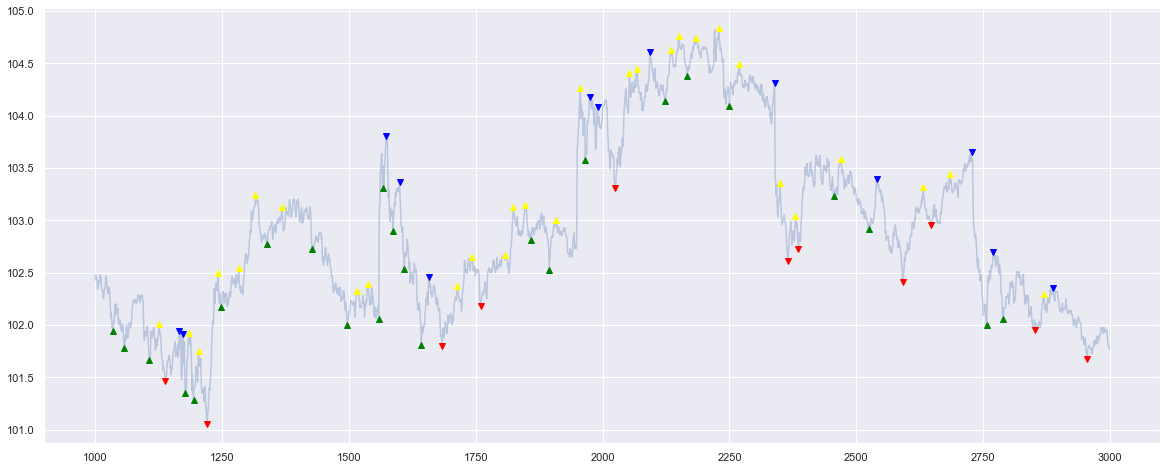

In [23]:
percentage_extrema=0.003
percentage_rebound=0.3
order_left_min=1
order_right_min=10
order_left_max=60
order_right_max=50
window_sizes_X=np.arange(1,10)

df_mins,df_maxs,df=extrema_values2.get_model_intraday(percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)


data=df['price'].iloc[1000:3000]

data.plot(figsize=(20,8), alpha=.3)
locs_extrema_rebound=df_mins[df_mins['is_rebound']==1].index.intersection(data.index)
locs_extrema_not_rebound=df_mins[df_mins['is_rebound']==0].index.intersection(data.index)
# filter prices that are peaks and plot them differently to be visable on the plot
data.loc[locs_extrema_rebound].plot(style='.', lw=10, color='red', marker="v");
data.loc[locs_extrema_not_rebound].plot(style='.', lw=10, color='green', marker="^");


locs_extrema_rebound=df_maxs[df_maxs['is_rebound']==1].index.intersection(data.index)
locs_extrema_not_rebound=df_maxs[df_maxs['is_rebound']==0].index.intersection(data.index)
# filter prices that are peaks and plot them differently to be visable on the plot
data.loc[locs_extrema_rebound].plot(style='.', lw=10, color='blue', marker="v");
data.loc[locs_extrema_not_rebound].plot(style='.', lw=10, color='yellow', marker="^");


No handles with labels found to put in legend.


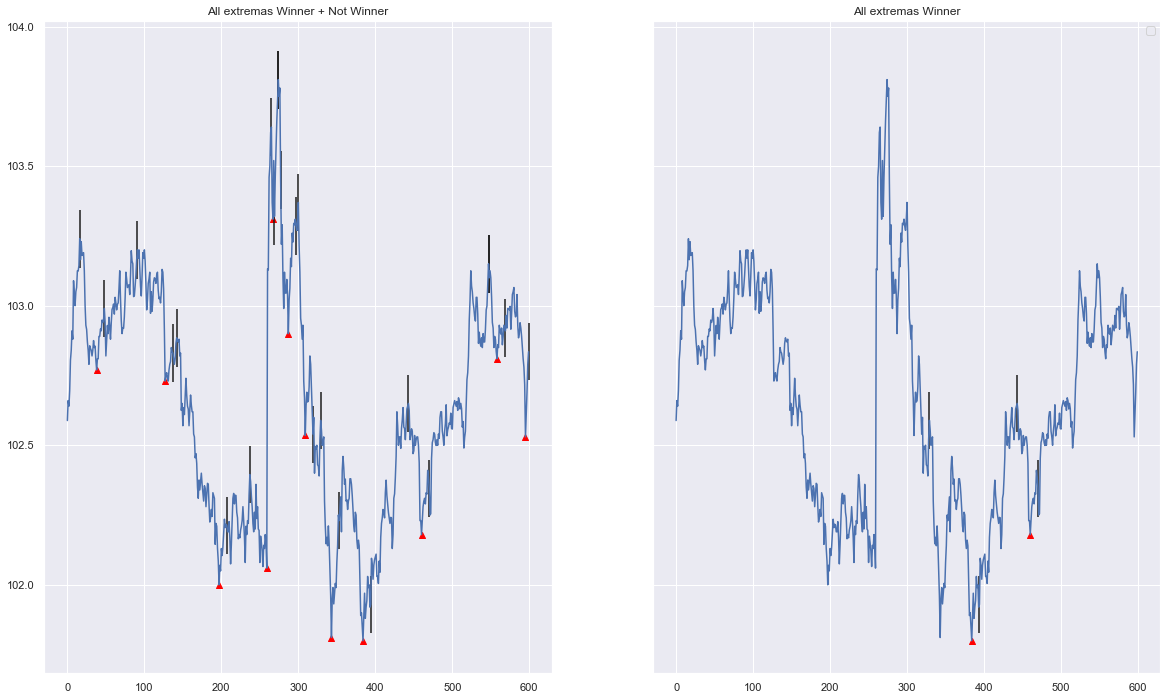

In [24]:

data=df['price'].iloc[1300:1900].values
x=np.arange(len(data))
locs_extrema,locs_winnning_extrema,left_borders,left_borders_val=extrema_values2.extrema_percentage(data, np.less,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max)


left_borders_loc=np.array([*left_borders.values()])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,12))
ax1.plot(x,data)
ax1.scatter(x[locs_extrema],data[locs_extrema],c='red',marker="^")


v_lines_high=0.001

right_min_border=np.clip(x[locs_extrema]+order_right_min,a_max=len(data)-1,a_min=0)
ax1.vlines(x=right_min_border, ymin=data[right_min_border]*(1-v_lines_high), ymax=data[right_min_border]*(1+v_lines_high))

left_min_border=left_borders_loc
ax1.vlines(x=left_min_border, ymin=data[left_min_border]*(1-v_lines_high), ymax=data[left_min_border]*(1+v_lines_high))

ax1.set_title('All extremas Winner + Not Winner')


ax2.plot(x,data)
ax2.scatter(x[locs_winnning_extrema],data[locs_winnning_extrema],c='red',marker="^")

right_min_border=np.clip(x[locs_winnning_extrema]+order_right_min,a_max=len(data)-1,a_min=0)
ax2.vlines(x=right_min_border, ymin=data[right_min_border]*(1-v_lines_high), ymax=data[right_min_border]*(1+v_lines_high))

left_min_border=left_borders_loc[locs_winnning_extrema[locs_extrema]]
ax2.vlines(x=left_min_border, ymin=data[left_min_border]*(1-v_lines_high), ymax=data[left_min_border]*(1+v_lines_high))
ax2.set_title('All extremas Winner')
plt.legend()

In [25]:
df_mins.groupby('is_rebound')['Ticker'].count()/df_mins.shape[0]

is_rebound
0    0.688468
1    0.311532
Name: Ticker, dtype: float64

In [26]:
a='20190102'
date = datetime.strptime(a, '%Y%m%d')
date

datetime.datetime(2019, 1, 2, 0, 0)

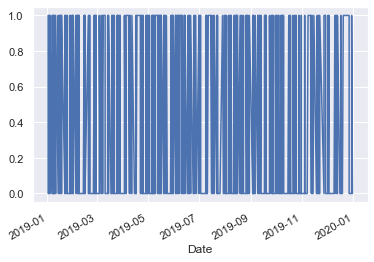

In [27]:
df_mins_copy=df_mins.copy()
df_mins_copy['Date']=df_mins_copy['Date'].apply(lambda x:datetime.strptime(str(x), '%Y%m%d'))

df_mins_copy.set_index('Date',inplace=True)

df_mins_copy['is_rebound'].plot()

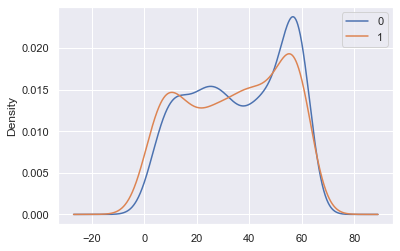

In [33]:
df_mins.groupby('is_rebound')['width_left'].plot.density()
plt.legend()

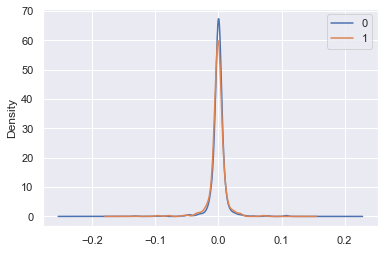

In [32]:
df_mins.groupby('is_rebound')['return_left_borders_per_day'].plot.density()
plt.legend()

# UMAP

In [9]:
percentage_extrema=0.003
percentage_rebound=0.3
order_left_min=1
order_right_min=10
order_left_max=60
order_right_max=50
window_sizes_X=np.arange(1,60)

df_mins,df_maxs,df=extrema_values2.get_model_intraday(percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)





C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mins['width_left']=width_left
C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mins['return_left_borders_per_day']=(np.log(df_mins.price.values)-np.log(minimas_info[3]))/width_left
C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:275: SettingWithCopyWarning: 
A value is trying to be set o

In [13]:
counter=df_mins.groupby('is_rebound')['price'].count()
counter

is_rebound
0    800
1    362
Name: price, dtype: int64

In [14]:
counter=df_maxs.groupby('is_rebound')['price'].count()
counter

is_rebound
0    930
1    371
Name: price, dtype: int64

In [15]:
df_mins.columns

Index(['Ticker', 'Per', 'Date', 'Time', 'Open', 'High', 'Low', 'Close',
       'Volume', 'price',
       ...
       'Return_per_Volume_before_58', 'ret_before_59', 'volume_diff_mean_59',
       'biggest_spread_day_before_59', 'spread_day_before_59',
       'spread_overnight_before_59', 'Return_per_Volume_before_59',
       'width_left', 'return_left_borders_per_day', 'is_rebound'],
      dtype='object', length=427)

In [16]:
df_mins.dropna(inplace=True)
labels=df_mins['is_rebound']
df_mins.drop(columns=['Ticker','Per','Date','Time','is_rebound'],inplace=True)

df_maxs.dropna(inplace=True)
labels_maxs=df_maxs['is_rebound']
df_maxs.drop(columns=['Ticker','Per','Date','Time','is_rebound'],inplace=True)

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Prosper Abega\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\U

In [17]:
scaler_min=StandardScaler()
scaler_min.fit(df_mins)
scaled_df_mins=scaler_min.fit_transform(df_mins)

scaler_max=StandardScaler()
scaler_max.fit(df_maxs)
scaled_df_maxs=scaler_max.fit_transform(df_maxs)

## UMAP Visualisation 

### Mins

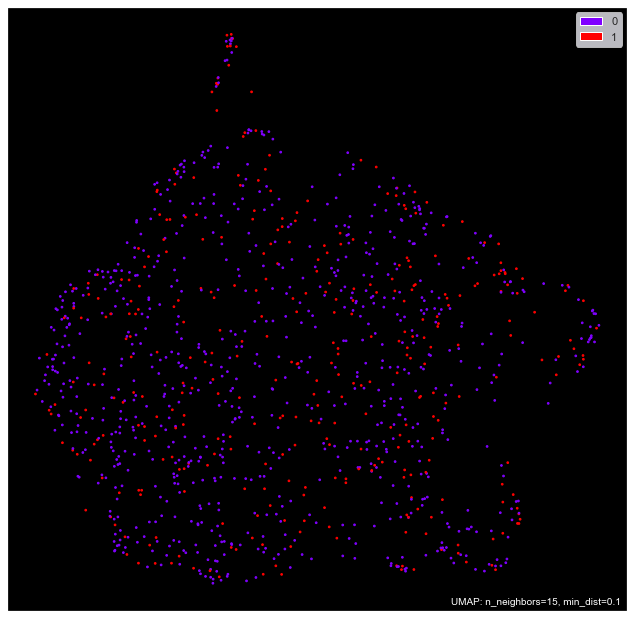

In [18]:
mapper = umap.UMAP().fit(scaled_df_mins)
umap.plot.points(mapper, labels=labels,theme='fire')

### Maxs

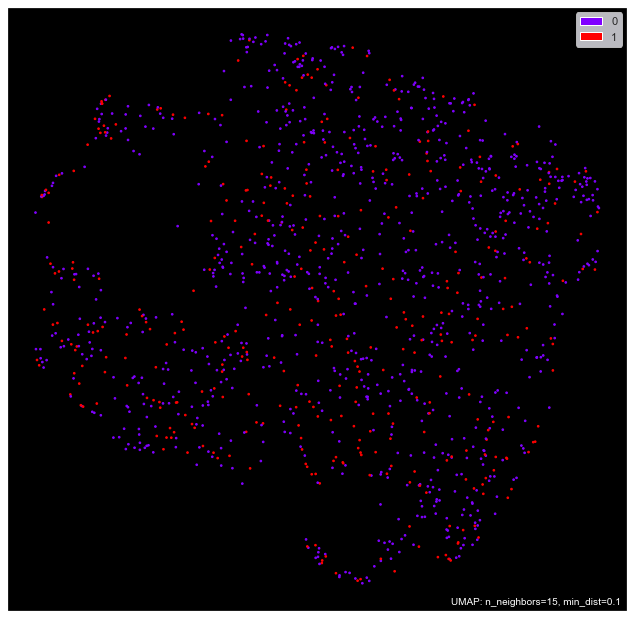

In [19]:
mapper = umap.UMAP().fit(scaled_df_maxs)
umap.plot.points(mapper, labels=labels_maxs,theme='fire')

## UMAP + PCA + K-mean 

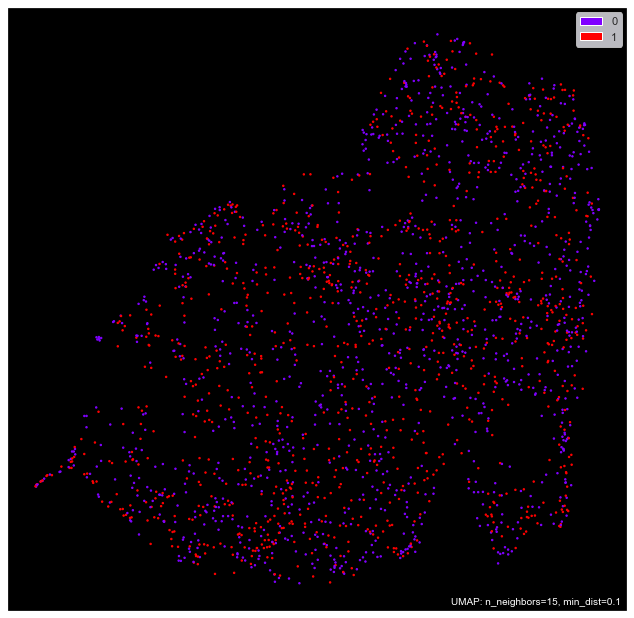

In [231]:
lowd_df_mins = PCA(n_components=50).fit_transform(scaled_df_mins)
mapper_lowd_df_mins = umap.UMAP().fit(lowd_df_mins)
clusterable_embedding = umap.UMAP().fit_transform(lowd_df_mins)
umap.plot.points(mapper_lowd_df_mins, labels=labels,theme='fire')

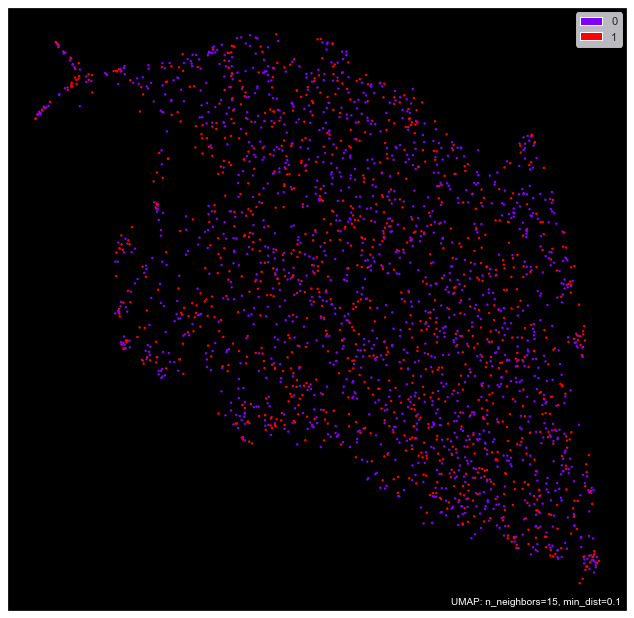

In [232]:
lowd_df_maxs = PCA(n_components=50).fit_transform(scaled_df_maxs)
mapper_lowd_df_maxs = umap.UMAP().fit(lowd_df_maxs)
clusterable_embedding = umap.UMAP().fit_transform(lowd_df_maxs)
umap.plot.points(mapper_lowd_df_maxs, labels=labels_maxs,theme='fire')

(0.00217175838320541, 0.0003490006509108847)

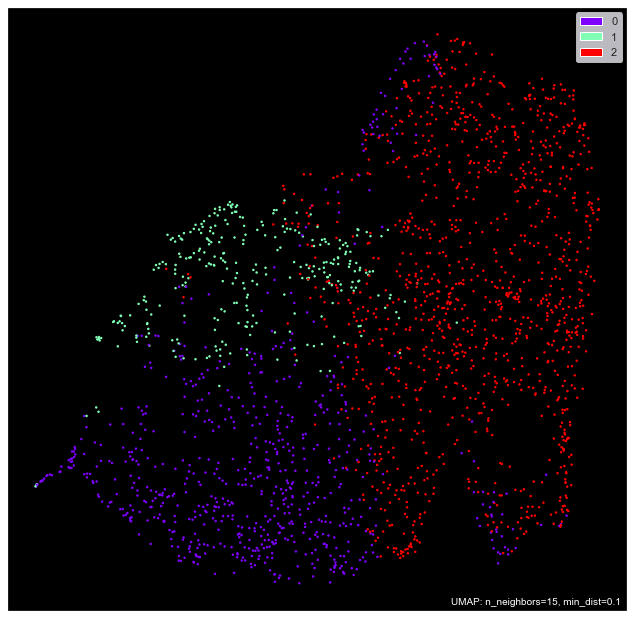

In [233]:
kmeans_labels = cluster.KMeans(n_clusters=3).fit_predict(lowd_df_mins)
umap.plot.points(mapper_lowd_df_mins, labels=kmeans_labels,theme='fire')

(
    adjusted_rand_score(labels, kmeans_labels),
    adjusted_mutual_info_score(labels, kmeans_labels)
)

In [234]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(labels,kmeans_labels)
print(cm)
print('Accuraccy: ',cm[1][1]/(cm[1][0]+cm[1][1]))

[[375 154 672]
 [343 151 541]
 [  0   0   0]]
Accuraccy:  0.305668016194332


## UMAP +  PCA + HDBSCAN

In [235]:
lowd_df_mins = PCA(n_components=50).fit_transform(scaled_df_mins)
clusterable_embedding = umap.UMAP().fit_transform(lowd_df_mins)

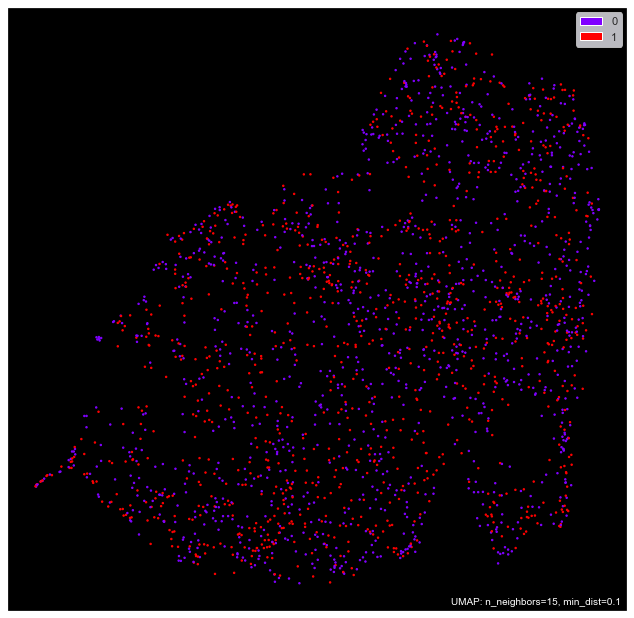

In [236]:
umap.plot.points(mapper_lowd_df_mins, labels=labels,theme='fire')

In [237]:

hdbscan_labels = hdbscan.HDBSCAN(
    min_samples=15,
    min_cluster_size=100,
).fit_predict(clusterable_embedding)

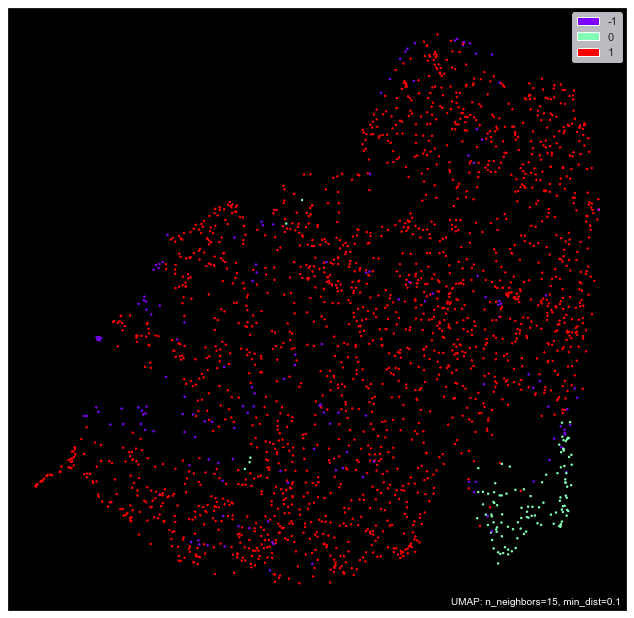

In [238]:
umap.plot.points(mapper_lowd_df_mins, labels=hdbscan_labels,theme='fire')

In [239]:
adjusted_rand_score(labels, hdbscan_labels), adjusted_mutual_info_score(labels, hdbscan_labels)

(-0.001775933380318691, -0.0002293322460297342)

In [240]:
clustered = (hdbscan_labels >= 0)
(
    adjusted_rand_score(labels[clustered], hdbscan_labels[clustered]),
    adjusted_mutual_info_score(labels[clustered], hdbscan_labels[clustered])
)

(-0.0004778735406171172, -0.0004788000483462303)

# UMAP with different class (intensity of rebound)

In [241]:
percentage_extrema=0.002

rebounds=[0.5,1,1.5,2]
percentage_rebound_small=0.1
order_left_min=5
order_right_min=10
order_left_max=60
order_right_max=20
window_sizes_X=np.arange(1,60)


df_mins_small,df_maxs_small,df=extrema_values2.get_model_intraday(percentage_extrema,percentage_rebound_small,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)

for k,pct_rebound in enumerate(rebounds):

    df_mins_big,df_maxs_big,df=extrema_values2.get_model_intraday(percentage_extrema,pct_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)
    index_big_rebound=df_mins_big.index[df_mins_big['is_rebound']==1]
    df_mins_small['is_rebound'].loc[index_big_rebound]=2+k



C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:271: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:275: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:278: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

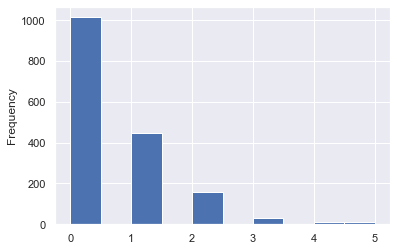

In [242]:
df_mins_small['is_rebound'].plot.hist()

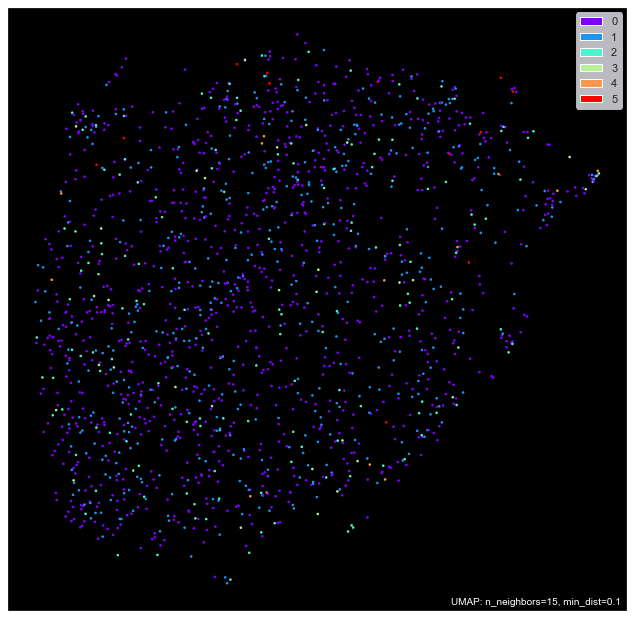

In [243]:
df_mins_small.dropna(inplace=True)
labels=df_mins_small['is_rebound']
df_mins_small.drop(columns=['Ticker','Per','Date','Time','is_rebound'],inplace=True)

scaler=StandardScaler()
scaler.fit(df_mins_small)
scaled_df_mins=scaler.fit_transform(df_mins_small)

mapper = umap.UMAP().fit(scaled_df_mins)
umap.plot.points(mapper, labels=labels,theme='fire')

In [244]:
lowd_df_mins = PCA(n_components=50).fit_transform(scaled_df_mins)
clusterable_embedding = umap.UMAP().fit_transform(lowd_df_mins)


(0.01567532544361968, 0.005642923256003769)

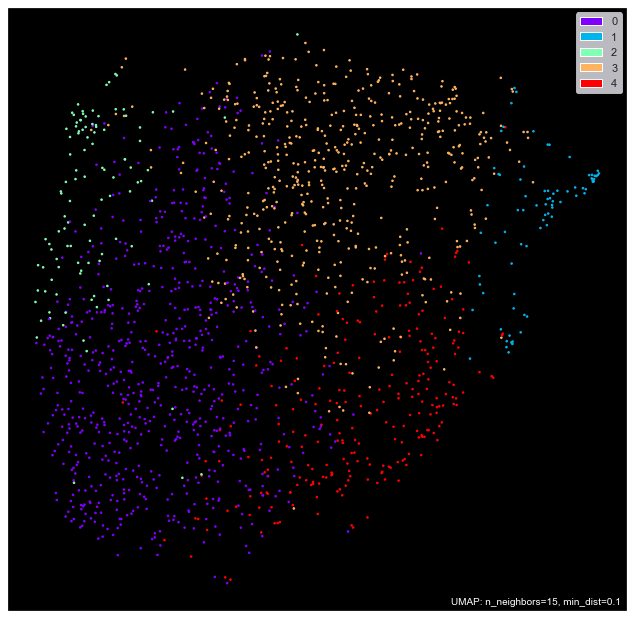

In [245]:
kmeans_labels = cluster.KMeans(n_clusters=5).fit_predict(lowd_df_mins)
umap.plot.points(mapper, labels=kmeans_labels,theme='fire')

(
    adjusted_rand_score(labels, kmeans_labels),
    adjusted_mutual_info_score(labels, kmeans_labels)
)

# Trying Random forest

In [3]:
def random_forest_model(df,labels,low_dimension=False,test_size=0.33):
    print('test_size: ',test_size )
    features=df.columns
    
    X_train, X_test, y_train, y_test = train_test_split(df.copy(), labels.copy(), test_size=test_size,shuffle=False)

    scaler=StandardScaler()
    scaler.fit(X_train)
    scaled_train=scaler.fit_transform(X_train)
    X_train=scaled_train
    
    if low_dimension:
        pca=PCA(50)
        pca.fit(scaled_train)
        print('Explained variance :',np.sum(pca.explained_variance_ratio_))
        lowd_train = pca.fit_transform(scaled_train)
        X_train=lowd_train
        
        features=np.arange(50)
        
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    print(random_grid)


    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)

    print(rf_random.best_params_)


    scaled_test=scaler.fit_transform(X_test)
    X_test=scaled_test
    
    if low_dimension:
        lowd_test = pca.fit_transform(scaled_test)
        X_test=lowd_test
    
    best_rf=rf_random.best_estimator_

    best_rf.fit(X_train, y_train)
    pred=best_rf.predict(X_test)
    pred=pd.Series(pred,index=y_test.index)
    
    
    print("Accuracy for Random Forest on test data: ",accuracy_score(y_test,pred))
    
    
    precision_score_=precision_score(y_test,pred.values, average=None)
    print("Precision Score on test :", precision_score_)
    print("Pct rebound in test :",(y_test==1).mean())
    
    return best_rf,pred,features

def get_particular_feature(x,col_start_name,path_quantile):
    width_left=x['width_left']
    mid_path_time=max(1,int(width_left*path_quantile))
    mid_path_ret=x[col_start_name+'_before_'+str(int(mid_path_time))]
    
    return mid_path_ret

def add_width_independent_features(df,col_start_name,path_quantile_list):
    
    for path_quantile in path_quantile_list:
        s=df.apply(lambda x: get_particular_feature(x,col_start_name,path_quantile),axis=1)
        df['Indep_'+col_start_name+'_'+str(path_quantile)]=s.copy()
    
    

def prepare_data(df_mins,df_maxs):
    
    to_drop=[col for col in ['Ticker','Per','Date','Time','is_rebound'] if col in df_mins.columns]
    
    df_mins.dropna(inplace=True)
    labels_mins=df_mins['is_rebound'].copy()
    df_mins.drop(columns=to_drop,inplace=True)


    df_maxs.dropna(inplace=True)
    labels_maxs=df_maxs['is_rebound'].copy()
    df_maxs.drop(columns=to_drop,inplace=True)
    
    return df_mins,labels_mins,df_maxs,labels_maxs

In [27]:
percentage_extrema=0.003
percentage_rebound=0.3
order_left_min=1
order_right_min=10
order_left_max=60
order_right_max=50
window_sizes_X=np.arange(1,60)

df_mins,df_maxs,df=extrema_values2.get_model_intraday(percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)


df_mins,labels_mins,df_maxs,labels_maxs=prepare_data(df_mins,df_maxs)

add_width_independent_features(df_mins,'Return_per_Volume',[3/4,2/3,1/2,1/3,1/4])
add_width_independent_features(df_mins,'volume_diff',[3/4,2/3,1/2,1/3,1/4])
add_width_independent_features(df_mins,'ret',[3/4,2/3,1/2,1/3,1/4])
add_width_independent_features(df_mins,'Return_per_Volume_mean',[3/4,2/3,1/2,1/3,1/4])

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:273: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:274: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\extrema_values2.py:278: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

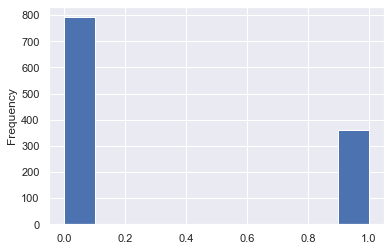

In [28]:
labels_mins.plot.hist()

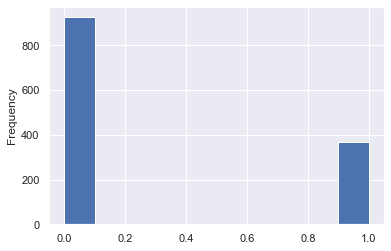

In [29]:
labels_maxs.plot.hist()

## Mins

### With all features

In [8]:
labels_mins.shape[0]*0.33

380.16

In [9]:
(labels_mins==1).sum()/labels_mins.shape[0]

0.3125

In [10]:
rf_best_mins,pred_mins,features_mins=random_forest_model(df_mins,labels_mins,low_dimension=False)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 87, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.6902887139107612
Precision Score on test : [0.70958904 0.25      ]


In [11]:
d = {'Stats':features_mins,'FI':rf_best_mins.feature_importances_}
fi_all = pd.DataFrame(d)
fi_all = fi_all.sort_values(by='FI', ascending=0)
# fig = px.bar_polar(fi, r="FI", theta="Stats",
#                    color="Stats", template="plotly_dark",
#                    color_discrete_sequence= px.colors.sequential.Plasma_r)
# fig.show()

### Only important features

In [12]:
nb_features=15

selected_features=fi_all['Stats'].iloc[:nb_features].values
rf_best_mins_reduced,pred_mins_reduced,features_mins_reduced=random_forest_model(df_mins[selected_features],labels_mins,low_dimension=False)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 98, 'bootstrap': False}
Accuracy for Random Forest on CV data:  0.5800524934383202
Precision Score on test : [0.7032967  0.26851852]


In [13]:
d = {'Stats':features_mins_reduced,'FI':rf_best_mins_reduced.feature_importances_}
fi = pd.DataFrame(d)
fi = fi.sort_values(by='FI', ascending=0)
fig = px.bar_polar(fi, r="FI", theta="Stats",
                   color="Stats", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [112]:
nb_features=5

selected_features=fi_all['Stats'].iloc[:nb_features].values
rf_best_mins_reduced,pred_mins_reduced,features_mins_reduced=random_forest_model(df_mins[selected_features],labels_mins,low_dimension=False)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 54, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.5091863517060368
Precision Score on test : [0.72340426 0.30051813]


In [113]:
d = {'Stats':features_mins_reduced,'FI':rf_best_mins_reduced.feature_importances_}
fi = pd.DataFrame(d)
fi = fi.sort_values(by='FI', ascending=0)
fig = px.bar_polar(fi, r="FI", theta="Stats",
                   color="Stats", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [30]:
selected_features=['ret_after_5', 'Return_per_Volume_before_38',
       'Return_per_Volume_after_2', 'volume_diff_after_4',
       'spread_day_after_5']+[col for col in df_mins.columns if 'Indep' in col]

rf_best_mins_reduced,pred_mins_reduced,features_mins_reduced=random_forest_model(df_mins[selected_features],labels_mins,low_dimension=False)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 76, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.6902887139107612
Precision Score on test : [0.7325228  0.42307692]


In [31]:
d = {'Stats':features_mins_reduced,'FI':rf_best_mins_reduced.feature_importances_}
fi = pd.DataFrame(d)
fi = fi.sort_values(by='FI', ascending=0)
fig = px.bar_polar(fi, r="FI", theta="Stats",
                   color="Stats", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [32]:
selected_features=fi['Stats'].iloc[:20].values

rf_best_mins_reduced,pred_mins_reduced,features_mins_reduced=random_forest_model(df_mins[selected_features],labels_mins,low_dimension=False)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 76, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.6771653543307087
Precision Score on test : [0.72839506 0.38596491]


In [33]:
d = {'Stats':features_mins_reduced,'FI':rf_best_mins_reduced.feature_importances_}
fi = pd.DataFrame(d)
fi = fi.sort_values(by='FI', ascending=0)
fig = px.bar_polar(fi, r="FI", theta="Stats",
                   color="Stats", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

## Final feature selection

In [81]:
good_features_for_mins=['ret_after_5', 'Return_per_Volume_before_38',
       'Return_per_Volume_after_2', 'volume_diff_after_4',
       'spread_day_after_5']+[col for col in df_mins.columns if 'Indep' in col]

good_features_for_mins

['ret_after_5',
 'Return_per_Volume_before_38',
 'Return_per_Volume_after_2',
 'volume_diff_after_4',
 'spread_day_after_5',
 'Indep_Return_per_Volume__0.75',
 'Indep_Return_per_Volume__0.6666666666666666',
 'Indep_Return_per_Volume__0.5',
 'Indep_Return_per_Volume__0.3333333333333333',
 'Indep_Return_per_Volume__0.25',
 'Indep_volume_diff__0.75',
 'Indep_volume_diff__0.6666666666666666',
 'Indep_volume_diff__0.5',
 'Indep_volume_diff__0.3333333333333333',
 'Indep_volume_diff__0.25',
 'Indep_ret__0.75',
 'Indep_ret__0.6666666666666666',
 'Indep_ret__0.5',
 'Indep_ret__0.3333333333333333',
 'Indep_ret__0.25',
 'Indep_Return_per_Volume_mean__0.75',
 'Indep_Return_per_Volume_mean__0.6666666666666666',
 'Indep_Return_per_Volume_mean__0.5',
 'Indep_Return_per_Volume_mean__0.3333333333333333',
 'Indep_Return_per_Volume_mean__0.25']

In [82]:
rf_best_mins_selected,pred_mins_selected,features_mins_selected=random_forest_model(df_mins[good_features_for_mins],labels_mins,low_dimension=False)

d = {'Stats':features_mins_reduced,'FI':rf_best_mins_reduced.feature_importances_}
fi = pd.DataFrame(d)
fi = fi.sort_values(by='FI', ascending=0)
fig = px.bar_polar(fi, r="FI", theta="Stats",
                   color="Stats", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 87, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.6955380577427821
Precision Score on test : [0.72861357 0.42857143]


## Significativity

In [134]:
def significativity_classification(proba,precision_obtained,y_test,N):
    precision_score_list=[]
    for k in tqdm(range(N)):
        random_selection=np.random.binomial(1,(y_test==1).mean(),size=y_test.shape[0])
        precision_score_=precision_score(y_test,random_selection, average=None)
        precision_score_list.append(precision_score_[1])
        
    sns.distplot(precision_score_list)
    plt.plot([precision_obtained,precision_obtained],[0,N/200],c='red')
    
    return np.array(precision_score_list)


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 289.02it/s]


p_value:  0.001


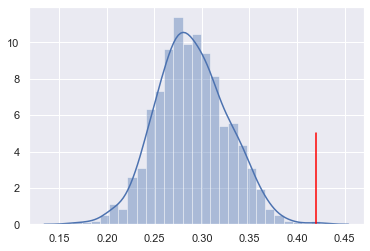

In [139]:
N=1000
X_train, X_test, y_train, y_test = train_test_split(df_mins.copy(), labels_mins.copy(), test_size=0.33,shuffle=False)
proba=(y_test==1).mean()
precision_obtained=0.42

precision_score_list=significativity_classification(proba,precision_obtained,y_test,N)



print('p_value: ',(precision_score_list>precision_obtained).mean())

## Maxs

### All features

In [16]:
(labels_maxs==1).sum()/labels_maxs.shape[0]

0.3320209973753281

In [17]:
rf_best_maxs,pred_maxs,features_maxs=random_forest_model(df_maxs,labels_maxs,low_dimension=False)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 76, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.6821192052980133
Precision Score on test : [0.69902913 0.32352941]


In [18]:
d = {'Stats':features_maxs,'FI':rf_best_maxs.feature_importances_}
fi_maxs = pd.DataFrame(d)
fi_maxs = fi_maxs.sort_values(by='FI', ascending=0)
# fig = px.bar_polar(fi, r="FI", theta="Stats",
#                    color="Stats", template="plotly_dark",
#                    color_discrete_sequence= px.colors.sequential.Plasma_r)
# fig.show()

### Only imortant features

In [19]:
nb_features=50
selected_features=fi_maxs['Stats'].iloc[:nb_features].values
rf_best_maxs_reduced,pred_maxs_reduced,features_maxs_reduced=random_forest_model(df_maxs[selected_features],labels_maxs,low_dimension=False)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.6768211920529801
Precision Score on test : [0.69957687 0.32608696]


In [20]:
d = {'Stats':features_maxs_reduced,'FI':rf_best_maxs_reduced.feature_importances_}
fi_maxs_reduced = pd.DataFrame(d)
fi_maxs_reduced = fi_maxs_reduced.sort_values(by='FI', ascending=0)
fig = px.bar_polar(fi_maxs_reduced, r="FI", theta="Stats",
                   color="Stats", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

# Show interest of the strategy 

In [128]:
def build_returns_after(df):
    return_potentials=df.copy()
    cols=[]
    for shift in range(order_right_min+1,order_right_max+1):
        col='ret_after_window_'+str(shift-order_right_min)
        cols.append(col)
        reuturn_period=shift-order_right_min
        return_potentials[col]=return_potentials['return'].rolling(shift).sum().shift(-shift)

    return_potentials=return_potentials[cols]
    
    return return_potentials

In [174]:
return_potentials=build_returns_after(df)

In [130]:
index_mins=labels_mins.index
index_mins_rebound=labels_mins[labels_mins==1].index
index_mins_not_rebound=labels_mins[labels_mins==0].index

In [131]:
freq_transac_mins=return_potentials.shape[0]/len(index_mins)
freq_transac_mins_rebound=return_potentials.shape[0]/len(index_mins_rebound)
freq_transac_mins_not_rebound=return_potentials.shape[0]/len(index_mins_not_rebound)

In [132]:
dates=df['Date'].apply(lambda x:datetime.strptime(str(x), '%Y%m%d'))

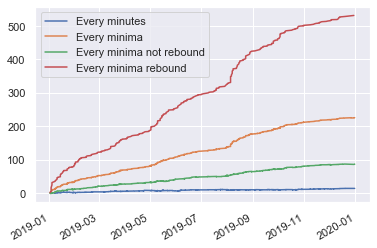

In [133]:
s1=return_potentials['ret_after_window_20'].cumsum()
s1=pd.Series(s1.values,index=dates.values,name="Every minutes")

s2=freq_transac_mins*return_potentials.loc[index_mins]['ret_after_window_20'].cumsum()
s2=pd.Series(s2.values,index=dates.loc[index_mins].values,name="Every minima")

s3=freq_transac_mins_not_rebound*return_potentials.loc[index_mins_not_rebound]['ret_after_window_20'].cumsum()
s3=pd.Series(s3.values,index=dates.loc[index_mins_not_rebound].values,name="Every minima not rebound")

s4=freq_transac_mins_rebound*return_potentials.loc[index_mins_rebound]['ret_after_window_20'].cumsum()
s4=pd.Series(s4.values,index=dates.loc[index_mins_rebound].values,name="Every minima rebound")



s1.plot()
s2.plot()
s3.plot()
s4.plot()
plt.legend()

# Try to implement the strategy

In [182]:
def build_startegy(preds,df,df_extrema,labels_extrema,stopLoss,takeProfit,holding_time,mins=True):
    
    X_train, X_test, y_train, y_test = train_test_split(df_extrema.copy(), labels_extrema, test_size=0.33,shuffle=False)
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,8))
    axes[0].set_title('Test repartition of labels')
    axes[1].set_title('Prediction repartition of labels')
    
    
    y_test.plot.hist(ax=axes[0])
    preds.plot.hist(ax=axes[1])
    
    
    plt.legend()
    plt.show()
    
    predictions=pd.Series(preds.values,index=y_test.index)
    idx_predictions_achat=predictions[predictions==1].index
    
    print('Nb total of candidate extremas: ',y_test.shape[0])
    print('Nb signal achat: ',len(idx_predictions_achat))
    
    return_potentials=build_returns_after(df)
    return_potentials=return_potentials.loc[idx_predictions_achat]
    
#     temp=return_potentials.apply(lambda x: takeProfit_stopLoss(x,stopLoss,takeProfit,mins=mins),axis=1)
#     holding_times,gains=list(map(list, zip(*temp.values)))
    
#     holding_times=pd.Series(holding_times,index=return_potentials.index)
#     holding_time_median=int(holding_times.median())
    
#     return_stopLoss_takeProfit=pd.Series(gains,index=return_potentials.index)

    strategy_returns=return_potentials['ret_after_window_'+str(holding_time)]
    strategy_return_stats=strategy_returns.describe()
    
    return_mean_period=df.price.pct_change(holding_time).loc[idx_predictions_achat[0]:idx_predictions_achat[-1]].mean()
    rapport_returns=strategy_return_stats.loc['mean']/return_mean_period
#     print('Holding Time Median: ',holding_time_median)
    print('Rapport Return moyen de la strategie/return moyen sur la periode: ',rapport_returns)
    
    
    
    return strategy_returns,strategy_return_stats
    
def takeProfit_stopLoss(x,stopLoss,takeProfit,mins=True):
    
    holding_time=0
    gain=0
    max_time=len(x)
    
#     condition=(mins and (x[holding_time]>takeProfit)) or ((not mins) and (-x[holding_time]>takeProfit))
#     while (holding_time<max_time-1 and condition):
#         holding_time+=1
#         gain+=x[holding_time]
#         condition=(mins and (x[holding_time]>takeProfit)) or (not mins and (-x[holding_time]>takeProfit))


        
    return 30,x[-1]
    
    


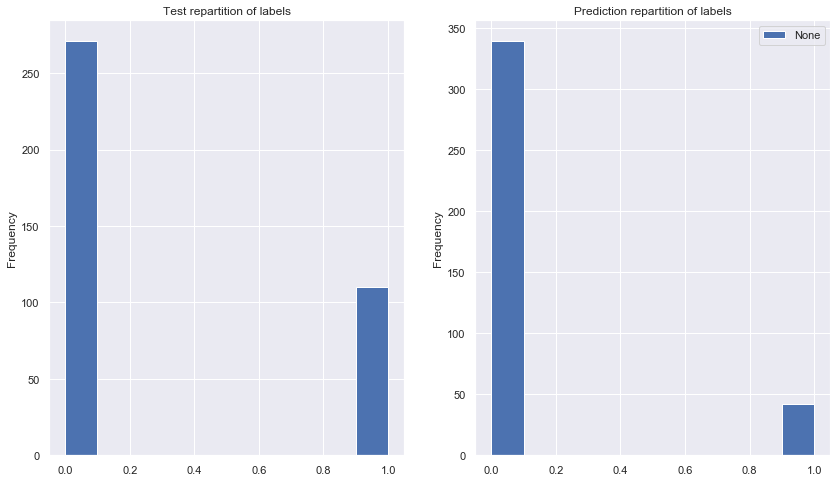

Nb total of candidate extremas:  381
Nb signal achat:  42
Rapport Return moyen de la strategie/return moyen sur la periode:  47.420959554682824


In [189]:
threshold_param=0.0001
mins=True
strategy_returns,strategy_return_stats=build_startegy(pred_mins_selected,df,df_mins,labels_mins,stopLoss,stopGain,20,mins=mins)

In [190]:
strategy_return_stats

count    42.000000
mean      0.003772
std       0.004296
min      -0.007326
25%       0.001551
50%       0.003029
75%       0.005743
max       0.013462
Name: ret_after_window_20, dtype: float64

In [191]:
return_potentials=build_returns_after(df)
return_potentials=return_potentials.loc[X_test.index]

dates=df['Date'].apply(lambda x:datetime.strptime(str(x), '%Y%m%d')).loc[X_test.index]

index_mins=y_test.index
index_mins_rebound=y_test[y_test==1].index
index_mins_not_rebound=y_test[y_test==0].index
index_predicted_mins=pred_mins_selected[pred_mins_selected==1].index

freq_transac_mins=return_potentials.shape[0]/len(index_mins)
freq_transac_mins_rebound=return_potentials.shape[0]/len(index_mins_rebound)
freq_transac_mins_not_rebound=return_potentials.shape[0]/len(index_mins_not_rebound)
freq_transac_predicted_mins=return_potentials.shape[0]/len(index_predicted_mins)

print(freq_transac_mins,freq_transac_mins_not_rebound,freq_transac_mins_rebound,freq_transac_predicted_mins)

1.0 1.4059040590405905 3.463636363636364 9.071428571428571


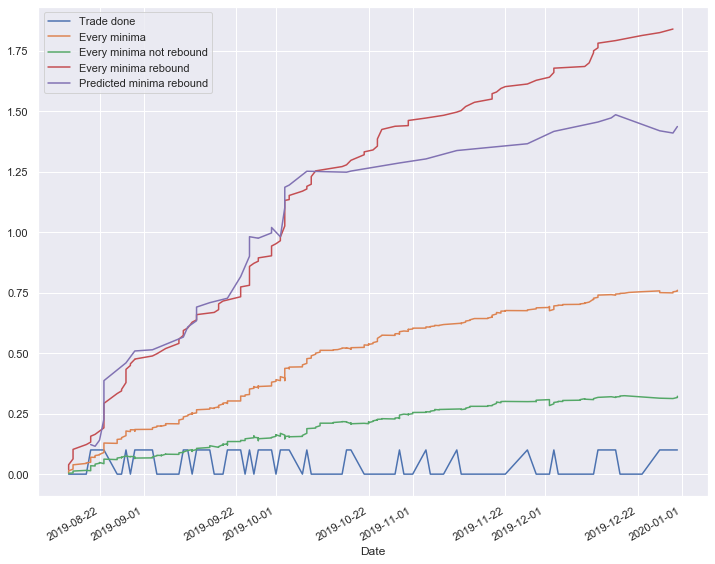

In [202]:
plt.figure(figsize=(12,10))

s1=pd.Series([0]*len(index_mins),index=dates,name="Trade done")
s1.loc[dates.loc[index_predicted_mins]]=0.1

s2=freq_transac_mins*return_potentials.loc[index_mins]['ret_after_window_20'].cumsum()
s2=pd.Series(s2.values,index=dates.values,name="Every minima")

s3=freq_transac_mins_not_rebound*return_potentials.loc[index_mins_not_rebound]['ret_after_window_20'].cumsum()
s3=pd.Series(s3.values,index=dates.loc[index_mins_not_rebound].values,name="Every minima not rebound")

s4=freq_transac_mins_rebound*return_potentials.loc[index_mins_rebound]['ret_after_window_20'].cumsum()
s4=pd.Series(s4.values,index=dates.loc[index_mins_rebound].values,name="Every minima rebound")

s5=freq_transac_predicted_mins*strategy_returns.cumsum()
s5=pd.Series(s5.values,index=dates.loc[index_predicted_mins].values,name="Predicted minima rebound")




s1.plot()
s2.plot()
s3.plot()
s4.plot()
s5.plot()
plt.legend()

# Visualisation of predictions

In [203]:
pred1=pred_mins_selected[pred_mins_selected==1].index
pred0=pred_mins_selected[pred_mins_selected==0].index

label1=y_test[y_test==1].index
label0=y_test[y_test==0].index

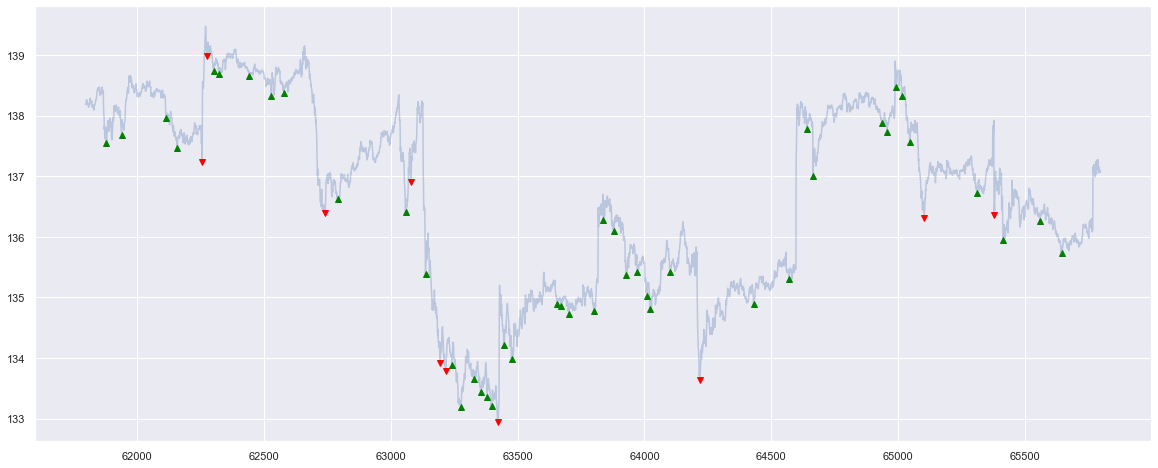

In [211]:
data=df.price.loc[y_test.index[0]:y_test.index[-1]].iloc[1000:5000]

data.plot(figsize=(20,8), alpha=.3)
locs_extrema_rebound=pred1.intersection(data.index)
locs_extrema_not_rebound=pred0.intersection(data.index)
# filter prices that are peaks and plot them differently to be visable on the plot
data.loc[locs_extrema_rebound].plot(style='.', lw=10, color='red', marker="v");
data.loc[locs_extrema_not_rebound].plot(style='.', lw=10, color='green', marker="^");

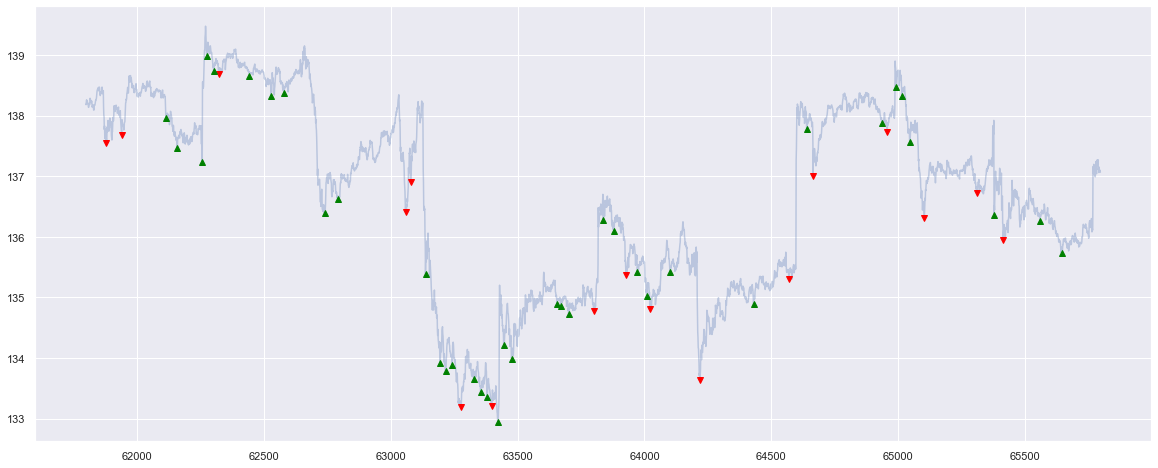

In [212]:
data=df.price.loc[y_test.index[0]:y_test.index[-1]].iloc[1000:5000]

data.plot(figsize=(20,8), alpha=.3)
locs_extrema_rebound=label1.intersection(data.index)
locs_extrema_not_rebound=label0.intersection(data.index)
# filter prices that are peaks and plot them differently to be visable on the plot
data.loc[locs_extrema_rebound].plot(style='.', lw=10, color='red', marker="v");
data.loc[locs_extrema_not_rebound].plot(style='.', lw=10, color='green', marker="^");

# With ES futures minute data

In [4]:
def get_partition(first_date,nb_period,day_freq=365):
    
    dates=[]
    previous_date=datetime.strptime(first_date, '%Y%m%d %H:%M')
    for k in range(1,nb_period+1):
        next_date=previous_date+timedelta(days=day_freq)
        
        dates.append((previous_date,next_date))
        
        previous_date=next_date
    
    return dates

def unzip_partition(partition):

    partition_borders = list(zip(*partition))
    end_of_years=list(partition_borders[1])
    start_of_years=list(partition_borders[0])
    start_of_years[1]=start_of_years[1]+timedelta(minutes=30)
    
    return start_of_years,end_of_years


def is_night(x):
    time=x
    if time.hour<=8:
        return 1
    elif time.hour>=20:
        return 1
    else:
        return 0
    
    
def prepare_data_ES():
    df=pd.read_parquet('ES-bbo_backmonth+0_1minute.parquet', engine='fastparquet')
    print(df.dtypes)
    df.set_index('index',drop=False,inplace=True)
    
    # Create an all minutes dataframe 
    # between first_date and last_date
    first_date=df.index[0]
    last_date=df.index[-1]
    all_dates_index=pd.date_range(start=first_date, end=last_date, freq='min')
    df_full=pd.DataFrame(index=all_dates_index,columns=df.columns)
    df_full.loc[df.index]=df
    df_full['index']=df_full.index
    
    df_full=df_full.astype(df.dtypes)
    
    # When the ask or the bid is 0
    # We replace it by NaN and then we will ffill it
    df_full['ask']=df_full['ask'].replace(to_replace=[0],value=np.nan)
    df_full['bid']=df_full['bid'].replace(to_replace=[0],value=np.nan)
    
    df_full.fillna(method='ffill',inplace=True)
    
    # Delete night points
    df_full['is_night']=df_full['index'].apply(lambda x: is_night(x))
    df_full=df_full[df_full['is_night']==0]
    df_full.drop(columns=['is_night','index'],inplace=True)
    
    return df_full

In [5]:
first_date='19970909 15:30'
half_year_partition=get_partition(first_date,nb_period=40,day_freq=182)

In [6]:
half_year_partition[:5]

[(datetime.datetime(1997, 9, 9, 15, 30),
  datetime.datetime(1998, 3, 10, 15, 30)),
 (datetime.datetime(1998, 3, 10, 15, 30),
  datetime.datetime(1998, 9, 8, 15, 30)),
 (datetime.datetime(1998, 9, 8, 15, 30),
  datetime.datetime(1999, 3, 9, 15, 30)),
 (datetime.datetime(1999, 3, 9, 15, 30),
  datetime.datetime(1999, 9, 7, 15, 30)),
 (datetime.datetime(1999, 9, 7, 15, 30),
  datetime.datetime(2000, 3, 7, 15, 30))]

In [7]:
df_prep=prepare_data_ES()

index    datetime64[ns]
bid             float64
bidQ            float64
ask             float64
askQ            float64
dtype: object


In [8]:
df_prep.head()

,bid,bidQ,ask,askQ
1997-09-09 15:31:00,929.25,10.0,944.50,3.0
1997-09-09 15:32:00,932.25,10.0,947.75,10.0
1997-09-09 15:33:00,932.50,10.0,947.75,10.0
1997-09-09 15:34:00,941.75,2.0,946.50,1.0
1997-09-09 15:35:00,941.50,8.0,946.25,2.0


## Visualisation

In [9]:
date1,date2=half_year_partition[33]

In [10]:
date_1=datetime(2014, 2, 19, 9,0 )
date_2=datetime(2014, 2, 19, 20,0 )

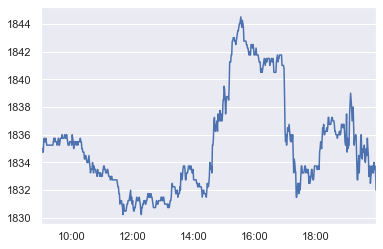

In [11]:
df_prep.ask.loc[date_1:date_2].plot()

In [12]:
np.abs(df_prep.loc[date_1:date_2].pct_change(30)).describe()

,bid,bidQ,ask,askQ
count,630.000000,630.000000,630.000000,630.000000
mean,0.001000,1.017280,0.001000,1.142874
std,0.001030,3.601428,0.001030,2.590331
min,0.000000,0.006135,0.000000,0.000000
25%,0.000273,0.278469,0.000272,0.247185
50%,0.000681,0.502568,0.000681,0.510373
75%,0.001361,0.830812,0.001361,0.910212
max,0.005566,82.666667,0.005565,42.000000


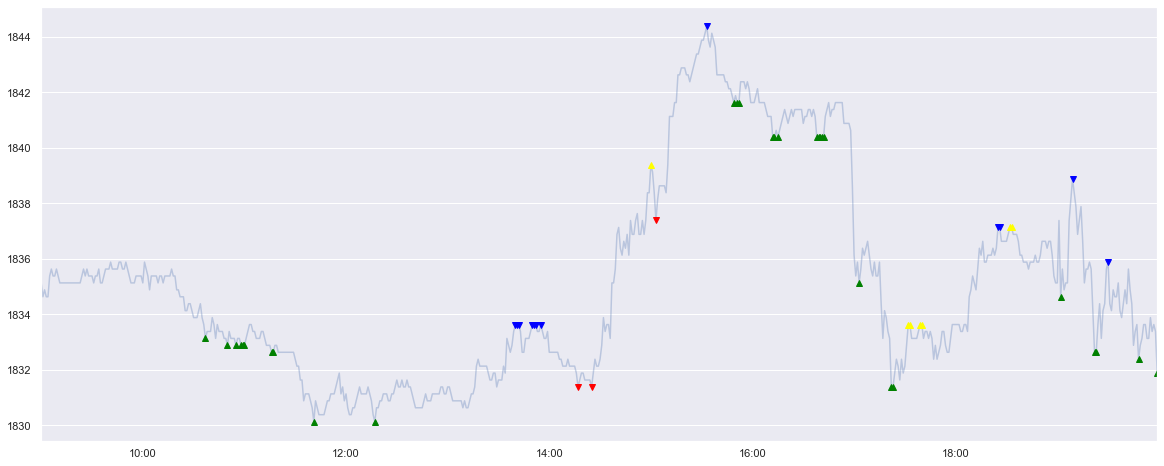

In [13]:
percentage_extrema=0.001
percentage_rebound=0.2
order_left_min=1
order_right_min=10
order_left_max=60
order_right_max=30
window_sizes_X=np.arange(1,10)

# .reset_index(drop=True)
df_mins,df_maxs,df=ES_minutes.get_model_intraday(df_prep.loc[date_1:date_2].copy(),percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)


data=df['price'].iloc[:]

data.plot(figsize=(20,8), alpha=.3)
locs_extrema_rebound_mins=df_mins[df_mins['is_rebound']==1].index.intersection(data.index)
locs_extrema_not_rebound_mins=df_mins[df_mins['is_rebound']==0].index.intersection(data.index)


# filter prices that are mins and plot them differently to be visable on the plot
data.loc[locs_extrema_rebound_mins].plot(style='.', lw=10, color='red', marker="v");
data.loc[locs_extrema_not_rebound_mins].plot(style='.', lw=10, color='green', marker="^");


locs_extrema_rebound=df_maxs[df_maxs['is_rebound']==1].index.intersection(data.index)
locs_extrema_not_rebound=df_maxs[df_maxs['is_rebound']==0].index.intersection(data.index)


# filter prices that are maxs and plot them differently to be visable on the plot
data.loc[locs_extrema_rebound].plot(style='.', lw=10, color='blue', marker="v");
data.loc[locs_extrema_not_rebound].plot(style='.', lw=10, color='yellow', marker="^");


## Random Forest

In [29]:
calc_along_left_path_cols=[
 'return',
 'ask_return',
 'bid_return',
 'spread_return',
 'Volume_incr',
 'Volume_incr_ask',
 'Volume_incr_bid',
 'Volume_incr_spread']

In [47]:
percentage_extrema=0.001
percentage_rebound=0.2
order_left_min=1
order_right_min=10
order_left_max=60
order_right_max=30
window_sizes_X=np.arange(1,60)

date1,date2=half_year_partition[34]
df_first_year=df_prep.loc[date1:date2]

df_mins,df_maxs,df=ES_minutes.get_model_intraday(df_first_year,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)


df_mins,labels_mins,df_maxs,labels_maxs=prepare_data(df_mins,df_maxs)


C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:213: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:214: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [48]:
for col in calc_along_left_path_cols:
    add_width_independent_features(df_mins,col,[3/4,2/3,1/2,1/3,1/4])

In [49]:
df_mins.shape[0]/df_first_year.shape[0]

0.029395359678990353

In [50]:
(labels_mins==1).mean()

0.2747097139620504

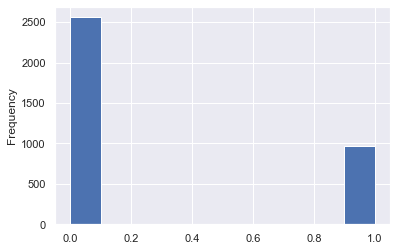

In [51]:
labels_mins.plot.hist()

## Feature Selection

In [35]:
try_columns=[col for col in df_mins.columns if 'after' in col or 'Indep' in col]
len(try_columns)

184

In [52]:
len(df_mins.columns)

1146

In [53]:
(labels_mins==1).mean()

0.2747097139620504

In [39]:
rf_best_mins,pred_mins,features_mins=random_forest_model(df_mins,labels_mins,low_dimension=False)

test_size:  0.33
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 87, 'bootstrap': True}
Accuracy for Random Forest on test data:  0.7068114511352419
Precision Score on test : [0.71242485 0.33333333]
Pct rebound in test : 0.2882527147087858


In [40]:
(pred_mins==1).mean()

0.014807502467917079

In [41]:
d = {'Stats':features_mins,'FI':rf_best_mins.feature_importances_}
fi = pd.DataFrame(d)
fi = fi.sort_values(by='FI', ascending=0)
# fig = px.bar_polar(fi, r="FI", theta="Stats",
#                    color="Stats", template="plotly_dark",
#                    color_discrete_sequence= px.colors.sequential.Plasma_r)
# fig.show()

In [ ]:
nb_features=50

selected_features=fi['Stats'].iloc[:nb_features].values
rf_best_mins_reduced,pred_mins_reduced,features_mins_reduced=random_forest_model(df_mins[selected_features],labels_mins,test_size=0.5,low_dimension=False)

test_size:  0.5
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
(labels_mins==1).mean()

In [ ]:
(pred_mins==1).mean()

In [ ]:
(pred_mins_reduced==1).mean()

In [ ]:
d = {'Stats':features_mins_reduced,'FI':rf_best_mins_reduced.feature_importances_}
fi_reduced = pd.DataFrame(d)
fi_reduced = fi_reduced.sort_values(by='FI', ascending=0)
fig = px.bar_polar(fi_reduced, r="FI", theta="Stats",
                   color="Stats", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

## Test next year

### Train

In [125]:
def roll_training(features,df,partition,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X):
    
    summary_columns=['Nb minimas','Nb rebound','Pct rebound','Precision','Nb predicted rebound','Pct predicted rebound','Dates start']
    
    calc_along_left_path_cols=[
         'return',
         'ask_return',
         'bid_return',
         'spread_return',
         'Volume_incr',
         'Volume_incr_ask',
         'Volume_incr_bid',
         'Volume_incr_spread']
    
    nb_training=len(partition)-1
    
    index=partition[1:]
    
    
    summary=pd.DataFrame(columns=summary_columns,index=np.arange(len(index)))
    models_params=[]
    
    labels=[]
    predictions=[]
    
    date0,date1=partition[0]
    k=0
    for date2,date3 in tqdm(index):
        
        ### Train on first year
        
        df_year_train=df.loc[date0:date1].copy()

        df_mins_train,df_maxs_train,df_train=ES_minutes.get_model_intraday(df_year_train,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)


        df_mins_train,labels_mins_train,df_maxs_train,labels_maxs_train=prepare_data(df_mins_train,df_maxs_train)


        for col in calc_along_left_path_cols:
            add_width_independent_features(df_mins_train,col,[3/4,2/3,1/2,1/3,1/4])
        
        
        scaler=StandardScaler()
        scaler.fit(df_mins_train[features])

        rf_best_mins_train,pred_mins_train,features_mins_train=random_forest_model(df_mins_train[features],labels_mins_train,low_dimension=False,test_size=0.01)
        
        
        ### Test on second year
        df_year_test=df.loc[date2:date3].copy()

        df_mins_test,df_maxs_test,df_test=ES_minutes.get_model_intraday(df_year_test,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)
        

        df_mins_test,labels_mins_test,df_maxs_test,labels_maxs_test=prepare_data(df_mins_test,df_maxs_test)

        for col in calc_along_left_path_cols:
            add_width_independent_features(df_mins_test,col,[3/4,2/3,1/2,1/3,1/4])

        scaled_test=scaler.fit_transform(df_mins_test[features])

        prediction_on_test_year=rf_best_mins_train.predict(scaled_test)
        
        nb_minimas=labels_mins_test.shape[0]
        nb_rebound=(labels_mins_test==1).sum()
        pct_rebound=(labels_mins_test==1).mean()
        
        nb_pred_rebound=(prediction_on_test_year==1).sum()
        pct_pred_rebound=(prediction_on_test_year==1).mean()
        
        precision=precision_score(labels_mins_test,prediction_on_test_year, average=None)[1]
        
    
        results=[nb_minimas,nb_rebound,pct_rebound,precision,nb_pred_rebound,pct_pred_rebound,date2]
        
        summary.loc[k]=results
        models_params.append(rf_best_mins_train.get_params())
        labels.append(labels_mins_test)
        predictions.append(prediction_on_test_year)
    
        date0,date1=date2,date3 
        k+=1
    
    return summary,models_params,labels,predictions
    

In [126]:
features40=['Volume_incr_spread_after_4', 'bid_return_before_4',
       'Volume_incr_ask_before_58', 'ask_return_before_28',
       'bid_return_after_2', 'spreadQ_before_6',
       'Volume_incr_spread_before_35', 'return_after_9', 'return_before_4',
       'return_left_borders_per_minutes', 'spreadQ_before_31',
       'bid_return_after_3', 'spread_return_before_14', 'bid_return_before_5',
       'Volume_incr_ask_after_4', 'spreadQ_after_6', 'askQ_before_7',
       'Volume_incr_before_25', 'Volume_incr_before_36', 'bid_return',
       'Volume_incr_spread_before_20', 'Volume_incr_spread_after_5',
       'Volume_incr_after_9', 'spreadQ_after_5', 'Volume_incr_before_18',
       'spreadQ_after_3', 'bidQ_before_48', 'ask_return_before_20',
       'return_before_30', 'bid_return_after_4', 'Volume_incr_before_56',
       'Volume_incr_spread_before_22', 'spreadQ_before_26',
       'Volume_incr_bid_before_19', 'Volume_incr_spread_before_10',
       'Volume_incr_bid_before_44', 'Volume_incr_before_9',
       'spreadQ_before_12', 'return_before_20', 'Volume_incr_before_13']

In [127]:
features30=['Volume_incr_spread_after_4', 'bid_return_before_4',
       'Volume_incr_before_9', 'Volume_incr_bid_after_6', 'spreadQ_before_33',
       'Volume_incr_ask_after_4', 'return_after_4',
       'Volume_incr_spread_before_6', 'Volume_incr_spread_before_35',
       'Volume_incr_before_27', 'spreadQ_before_11', 'Volume_incr_before_36',
       'spreadQ_before_58', 'return_before_4', 'spreadQ_before_59',
       'Volume_incr_bid_after_9', 'Volume_incr_ask_before_13',
       'Volume_incr_spread_before_51', 'return_before_45',
       'Volume_incr_spread_before_46', 'Volume_incr_before_23',
       'return_after_3', 'ask_return_after_6', 'Volume_incr_bid_after_1',
       'ask_return_before_4', 'return_after_2', 'Volume_incr_before_43',
       'Volume_incr_bid_before_36', 'return_before_3', 'spreadQ_after_2']

In [128]:
features100=['Volume_incr_ask_after_9', 'Indep_Volume_incr_spread_0.25',
       'Volume_incr_after_9', 'Indep_Volume_incr_bid_0.25',
       'Volume_incr_bid_after_9', 'Indep_Volume_incr_bid_0.75',
       'return_after_1', 'spreadQ_after_1',
       'Indep_Volume_incr_bid_0.6666666666666666',
       'Volume_incr_spread_after_1', 'Volume_incr_after_7',
       'Indep_Volume_incr_0.5', 'Indep_Volume_incr_spread_0.75',
       'bid_return_after_1', 'Indep_Volume_incr_bid_0.5', 'ask_return_after_6',
       'bid_return_after_6', 'ask_return_after_1', 'return_after_6',
       'Volume_incr_bid_after_6', 'Indep_Volume_incr_ask_0.75',
       'Indep_Volume_incr_ask_0.6666666666666666', 'Volume_incr_bid_after_8',
       'return_after_9', 'ask_return_after_9',
       'Indep_Volume_incr_spread_0.3333333333333333', 'Indep_bid_return_0.5',
       'Volume_incr_after_6', 'bid_return_after_9', 'Volume_incr_ask_after_7',
       'Indep_Volume_incr_spread_0.5', 'Volume_incr_after_2', 'bidQ_after_2',
       'Volume_incr_spread_after_9', 'Volume_incr_bid_after_3',
       'Indep_Volume_incr_spread_0.6666666666666666', 'bidQ_after_3',
       'Volume_incr_spread_after_7', 'Indep_ask_return_0.5',
       'bid_return_after_4', 'Volume_incr_ask_after_3',
       'Volume_incr_ask_after_1', 'Indep_Volume_incr_bid_0.3333333333333333',
       'Indep_bid_return_0.75', 'Indep_return_0.5', 'Volume_incr_ask_after_8',
       'return_after_2', 'Volume_incr_after_5', 'Volume_incr_spread_after_6',
       'bid_return_after_2', 'Volume_incr_after_8',
       'Volume_incr_spread_after_8', 'spreadQ_after_4',
       'Indep_Volume_incr_ask_0.3333333333333333', 'Indep_ask_return_0.25',
       'Indep_return_0.25', 'return_after_4', 'Volume_incr_bid_after_4',
       'Volume_incr_bid_after_5', 'Indep_Volume_incr_0.3333333333333333',
       'ask_return_after_2', 'Volume_incr_ask_after_5', 'return_after_8',
       'ask_return_after_3', 'Volume_incr_spread_after_4', 'Indep_return_0.75',
       'ask_return_after_7', 'Indep_Volume_incr_0.25', 'bidQ_after_1',
       'Indep_bid_return_0.6666666666666666', 'Volume_incr_spread_after_2',
       'Indep_Volume_incr_ask_0.25', 'Volume_incr_bid_after_2',
       'Volume_incr_ask_after_2', 'Indep_bid_return_0.25',
       'Volume_incr_after_1', 'return_after_3', 'bid_return_after_3',
       'Indep_Volume_incr_0.6666666666666666', 'Volume_incr_after_3',
       'Indep_Volume_incr_0.75', 'ask_return_after_4', 'spreadQ_after_9',
       'Indep_return_0.6666666666666666', 'Volume_incr_ask_after_6',
       'bidQ_after_5', 'Volume_incr_bid_after_1', 'Volume_incr_bid_after_7',
       'Indep_ask_return_0.75', 'bid_return_after_5', 'askQ_after_1',
       'askQ_after_2', 'return_after_5', 'bidQ_after_9', 'spreadQ_after_2',
       'ask_return_after_8', 'Volume_incr_ask_after_4', 'askQ_after_3',
       'ask_return_after_5', 'spreadQ_after_3']

In [255]:
features50=['Volume_incr_ask_before_8', 'bidQ_after_1', 'Volume_incr_before_1',
       'bid_return_before_4', 'return_before_7', 'ask_return_before_4',
       'Volume_incr_ask_before_30', 'return_after_3', 'return_after_7',
       'return_after_6', 'Volume_incr_bid_before_12', 'bid_return_before_14',
       'Volume_incr_ask_before_51', 'bid_return_after_7', 'Volume_incr',
       'Volume_incr_spread_before_54', 'Volume_incr_bid_before_19',
       'Volume_incr_ask_before_45', 'Volume_incr_spread_before_59',
       'return_before_8', 'ask_return_after_3', 'Volume_incr_ask_before_40',
       'Volume_incr_ask_after_8', 'ask_return_after_6', 'ask_return_before_29',
       'return_after_4', 'ask_return_after_4', 'return_before_15',
       'Volume_incr_spread_before_23', 'Volume_incr_spread_before_15',
       'Volume_incr_before_28', 'ask_return_after_5',
       'Volume_incr_spread_before_37', 'Volume_incr_spread_before_56',
       'Volume_incr_bid_before_20', 'spreadQ_after_6',
       'Volume_incr_spread_after_9', 'Volume_incr_before_46',
       'Volume_incr_bid_before_36', 'bid_return_after_5', 'spreadQ_before_9',
       'bid_return_after_4', 'Volume_incr_ask_before_35',
       'bid_return_before_2', 'ask_return_before_9',
       'Volume_incr_spread_after_6', 'spreadQ_before_5',
       'Volume_incr_before_33', 'Volume_incr_spread_after_2',
       'bid_return_before_7']

In [256]:
percentage_extrema=0
percentage_rebound=0.2
order_left_min=60
order_right_min=10
order_left_max=61
order_right_max=50
window_sizes_X=np.arange(1,60)


summary,models_params,labels,predictions=roll_training(features50,df_prep,half_year_partition[:8],percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)
    

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 76, 'bootstrap': True}
Accuracy for Random Forest on test data:  0.6666666666666666
Precision Score on test : [0.33333333 1.        ]


C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log

 14%|███████████▊                                                                       | 1/7 [02:33<15:19, 153.23s/it]C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 76, 'bootstrap': True}
Accuracy for Random Forest on test data:  0.42857142857142855
Precision Score on test : [0.5        0.33333333]


C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log

 29%|███████████████████████▋                                                           | 2/7 [05:03<12:36, 151.30s/it]C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}
Accuracy for Random Forest on test data:  0.42857142857142855
Precision Score on test : [0.   0.75]


C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

 43%|███████████████████████████████████▌                                               | 3/7 [07:44<10:24, 156.08s/it]C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 54, 'bootstrap': True}
Accuracy for Random Forest on test data:  0.5714285714285714
Precision Score on test : [0.66666667 0.5       ]


C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log

 57%|███████████████████████████████████████████████▍                                   | 4/7 [10:21<07:48, 156.20s/it]C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 76, 'bootstrap': False}
Accuracy for Random Forest on test data:  0.5714285714285714
Precision Score on test : [0.75       0.33333333]


C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log

 71%|███████████████████████████████████████████████████████████▎                       | 5/7 [13:07<05:19, 159.94s/it]C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 76, 'bootstrap': True}
Accuracy for Random Forest on test data:  0.42857142857142855
Precision Score on test : [1.         0.33333333]


C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log

 86%|███████████████████████████████████████████████████████████████████████▏           | 6/7 [15:46<02:39, 159.43s/it]C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

invalid value encountered in log



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}
Accuracy for Random Forest on test data:  0.625
Precision Score on test : [0.33333333 0.8       ]


C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [18:35<00:00, 159.29s/it]


In [257]:
summary

,Nb minimas,Nb rebound,Pct rebound,Precision,Nb predicted rebound,Pct predicted rebound,Dates start
0,609,313,0.513957,0.510638,376,0.617406,1998-03-10 15:30:00
1,623,335,0.537721,0.547337,338,0.542536,1998-09-08 15:30:00
2,671,342,0.509687,0.492099,443,0.660209,1999-03-09 15:30:00
3,652,354,0.542945,0.554945,364,0.558282,1999-09-07 15:30:00
4,679,343,0.505155,0.503282,457,0.673049,2000-03-07 15:30:00
5,743,356,0.479139,0.479315,701,0.943472,2000-09-05 15:30:00
6,640,329,0.514062,0.53144,493,0.770312,2001-03-06 15:30:00


In [258]:
summary.to_csv('summary_precision_RF_50Features_min_60_min_10min_right_40minAfter.csv', mode='a', header=False)

In [259]:
pd.DataFrame(models_params).to_csv('models_params_RF_50Features_min_60_min_10min_right_40minAfter.csv', mode='a', header=False)

In [25]:
summary['Dates start'].iloc[-2]

datetime.datetime(2008, 8, 26, 15, 30)

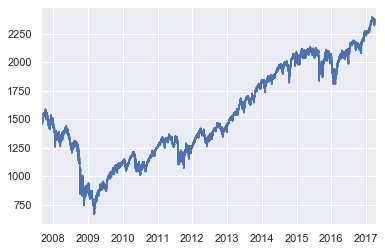

In [29]:
df_prep.ask.loc[summary['Dates start'].iloc[-3]:].plot()

In [329]:
summary

,Nb minimas,Nb rebound,Pct rebound,Precision,Nb predicted rebound,Pct predicted rebound,Dates start
0,629,210,0.333863,0.402778,72,0.114467,1998-03-08 15:30:00
1,837,353,0.421744,0.4,65,0.077658,1998-09-04 15:30:00
2,693,246,0.354978,0.442105,190,0.27417,1999-03-03 15:30:00


In [251]:
index=year_partition[1:]
for date2,date3 in index:
    print(date2,date3)

1998-09-09 15:30:00 1999-09-09 15:30:00
1999-09-09 15:30:00 2000-09-08 15:30:00
2000-09-08 15:30:00 2001-09-08 15:30:00
2001-09-08 15:30:00 2002-09-08 15:30:00
2002-09-08 15:30:00 2003-09-08 15:30:00
2003-09-08 15:30:00 2004-09-07 15:30:00
2004-09-07 15:30:00 2005-09-07 15:30:00
2005-09-07 15:30:00 2006-09-07 15:30:00
2006-09-07 15:30:00 2007-09-07 15:30:00
2007-09-07 15:30:00 2008-09-06 15:30:00
2008-09-06 15:30:00 2009-09-06 15:30:00
2009-09-06 15:30:00 2010-09-06 15:30:00
2010-09-06 15:30:00 2011-09-06 15:30:00
2011-09-06 15:30:00 2012-09-05 15:30:00
2012-09-05 15:30:00 2013-09-05 15:30:00
2013-09-05 15:30:00 2014-09-05 15:30:00
2014-09-05 15:30:00 2015-09-05 15:30:00
2015-09-05 15:30:00 2016-09-04 15:30:00
2016-09-04 15:30:00 2017-09-04 15:30:00


In [286]:
date1,date2=year_partition[2]
year_partition[2]

(datetime.datetime(1999, 9, 9, 15, 30), datetime.datetime(2000, 9, 8, 15, 30))

In [294]:
date2,date3=year_partition[3]
year_partition[3]

(datetime.datetime(2000, 9, 8, 15, 30), datetime.datetime(2001, 9, 8, 15, 30))

In [287]:

df_year_train=df_prep.loc[date1:date2]

df_mins_train,df_maxs_train,df_train=ES_minutes.get_model_intraday(df_year_train,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)


df_mins_train,labels_mins_train,df_maxs_train,labels_maxs_train=prepare_data(df_mins_train,df_maxs_train)

add_width_independent_features(df_mins_train,'ask_return',[1/4])
add_width_independent_features(df_mins_train,'return',[1/4])


scaler=StandardScaler()
scaler.fit(df_mins_train[features])

rf_best_mins_train,pred_mins_train,features_mins_train=random_forest_model(df_mins_train[features],labels_mins_train,low_dimension=False,test_size=0.33)

    

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:203: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:204: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 76, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.5524625267665952
Precision Score on test : [0.6300578  0.33057851]


In [296]:
 df_year_test=df_prep.loc[date2:date3]

df_mins_test,df_maxs_test,df_test=ES_minutes.get_model_intraday(df_year_test,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)


df_mins_test,labels_mins_test,df_maxs_test,labels_maxs_test=prepare_data(df_mins_test,df_maxs_test)

add_width_independent_features(df_mins_test,'ask_return',[1/4])
add_width_independent_features(df_mins_test,'return',[1/4])

scaled_test=scaler.fit_transform(df_mins_test[features])

prediction_on_test_year=rf_best_mins_train.predict(scaled_test)

nb_minimas=labels_mins_test.shape[0]
nb_rebound=(labels_mins_test==1).sum()
pct_rebound=(labels_mins_test==1).mean()

nb_pred_rebound=(prediction_on_test_year==1).sum()
pct_pred_rebound=(prediction_on_test_year==1).mean()

precision=precision_score(labels_mins_test,prediction_on_test_year, average=None)[1]


results=[nb_minimas,nb_rebound,pct_rebound,precision,nb_pred_rebound,pct_pred_rebound,date2]

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:203: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:204: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [304]:
pd.DataFrame(scaled_test,columns=features).describe()

,Volume_incr_ask_before_39,ask_return_after_4,return_after_4,bid_return_after_2,bid_return_before_6,bid_return_before_3,bid_return_after_4,ask_return_after_1,ask_return_before_3,return_after_3,...,return_before_7,Volume_incr_spread_before_39,ask_return_before_8,Volume_incr_ask_before_16,return_after_7,return_left_borders_per_minutes,return_before_1,Volume_incr_ask_before_19,askQ_before_59,ask_return_before_9
count,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,...,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03
mean,-5.734883e-17,-3.051873e-17,-1.677379e-17,-4.025621e-17,-9.963313e-19,7.638540e-18,-1.642397e-17,4.038463e-18,9.106468e-18,3.411881e-17,...,-1.568004e-17,-1.069484e-16,-9.220493e-18,1.556978e-16,-2.199899e-17,-2.887147e-16,2.776443e-18,-4.896636e-17,-4.314779e-16,-1.547967e-17
std,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,...,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00
min,-7.095675e+00,-1.185319e-01,-4.604942e-02,-4.944393e-02,-3.146801e+01,-3.146611e+01,-5.683340e-02,-8.941278e-02,-3.956852e+01,-4.422606e-02,...,-3.843731e+01,-7.171958e+00,-3.955934e+01,-7.260211e+00,-5.021917e-02,-1.799519e+01,-3.796289e+01,-5.824954e+00,-1.437407e+00,-3.955874e+01
25%,-3.128342e-01,-3.296575e-02,-4.012423e-02,-4.406365e-02,3.980914e-02,4.042408e-02,-4.464608e-02,-2.982439e-02,1.995049e-02,-3.930223e-02,...,2.633582e-02,-3.385766e-01,1.651477e-02,-2.889222e-01,-4.255898e-02,-1.743784e-01,3.248875e-02,-3.132104e-01,-7.104453e-01,1.585279e-02
50%,6.776110e-03,-2.809655e-02,-3.618021e-02,-4.272485e-02,4.323774e-02,4.310800e-02,-4.311057e-02,-2.720145e-02,2.787400e-02,-3.559883e-02,...,3.597388e-02,9.452506e-02,2.715251e-02,7.109745e-02,-3.666503e-02,4.957655e-02,3.665812e-02,5.180574e-02,-1.834867e-01,2.776919e-02
75%,3.086303e-01,-2.094477e-02,-2.996758e-02,-4.116025e-02,4.575515e-02,4.489882e-02,-4.082308e-02,-2.304057e-02,3.349667e-02,-3.067349e-02,...,4.340834e-02,3.832595e-01,3.717330e-02,3.329299e-01,-2.838065e-02,2.980694e-01,3.948893e-02,3.073170e-01,5.342550e-01,3.752959e-02
max,7.286789e+00,3.956777e+01,3.843609e+01,3.146720e+01,8.514468e-02,5.584160e-02,3.146757e+01,3.957129e+01,1.846922e-01,3.843637e+01,...,2.353813e-01,5.965458e+00,4.209894e-01,6.355076e+00,3.843818e+01,5.653105e+00,4.239035e-02,9.578727e+00,3.820831e+00,4.156064e-01


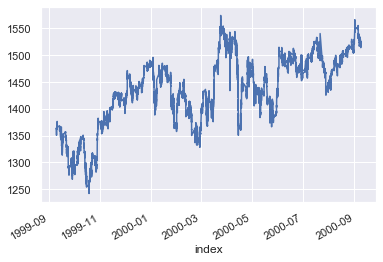

In [305]:
df_prep.ask.loc[date1:date2].plot()

In [310]:
df_prep.ask.loc[date2:date3].replace([0],np.nan).min()

45.0

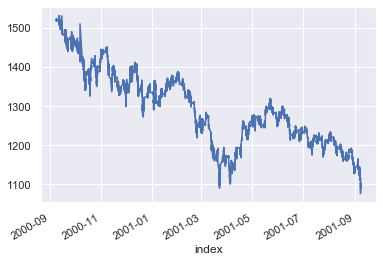

In [311]:
df_prep.ask.loc[date2:date3].replace([45.0],np.nan).plot()

In [290]:
(labels_mins_train==1).mean()

0.4

In [291]:
(pred_mins_train==1).mean()

0.25910064239828695

In [170]:
percentage_extrema=0.003
percentage_rebound=0.2
order_left_min=1
order_right_min=10
order_left_max=60
order_right_max=50
window_sizes_X=np.arange(1,60)

date1,date2=year_partition[0]
df_first_year=df_prep.loc[date1:date2]

df_mins,df_maxs,df=ES_minutes.get_model_intraday(df_first_year,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)


df_mins,labels_mins,df_maxs,labels_maxs=prepare_data(df_mins,df_maxs)


add_width_independent_features(df_mins,'ask_return',[1/4])
add_width_independent_features(df_mins,'return',[1/4])


C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:203: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:204: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [193]:
[col for col in features_mins_reduced if 'Indep' in col]

['Indep_ask_return_0.25', 'Indep_return_0.25']

In [173]:
scaler=StandardScaler()
scaler.fit(df_mins[features])

rf_best_mins_reduced,pred_mins_reduced,features_mins_reduced=random_forest_model(df_mins[features],labels_mins,low_dimension=False,test_size=0.01)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}
Accuracy for Random Forest on CV data:  0.5
Precision Score on test : [0.55555556 0.33333333]


In [174]:
year_partition[0]

(datetime.datetime(1997, 9, 9, 15, 30), datetime.datetime(1998, 9, 9, 15, 30))

In [175]:
year_partition[1]

(datetime.datetime(1998, 9, 9, 15, 30), datetime.datetime(1999, 9, 9, 15, 30))

### Test 

In [176]:
date1,date2=year_partition[1]
df_second_year=df_prep.loc[date1:date2]

df_mins,df_maxs,df=ES_minutes.get_model_intraday(df_second_year,percentage_extrema,percentage_rebound,order_left_min,order_left_max,order_right_min,order_right_max,window_sizes_X)



df_mins,labels_mins,df_maxs,labels_maxs=prepare_data(df_mins,df_maxs)


for col in calc_along_left_path_cols:
    add_width_independent_features(df_mins,col,[3/4,2/3,1/2,1/3,1/4])

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:203: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:204: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Desktop\CS\projet CS extrema\ES_minutes.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prosper Abega\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
u=scaler.fit_transform(df_mins[features_mins_reduced])

prediction_on_test_year=rf_best_mins_reduced.predict(u)

In [178]:
(prediction_on_test_year==1).mean()

0.0856958762886598

In [179]:
(labels_mins==1).mean()

0.39368556701030927

In [188]:
precision_obtained=precision_score(labels_mins,prediction_on_test_year, average=None)[1]

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.38it/s]


p_value:  0.0


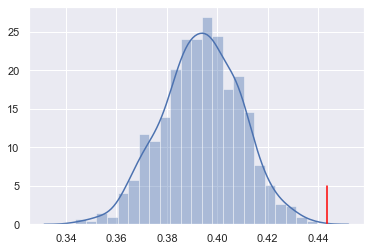

In [189]:
N=1000
proba=(labels_mins==1).mean()

precision_score_list=significativity_classification(proba,precision_obtained,labels_mins,N)


print('p_value: ',(precision_score_list>precision_obtained).mean())